In [17]:
import statistics
import pandas as pd
import numpy as np

In [18]:
# results_FNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/final_experiments_Pareto/automated_experiment_1_2022-05-17-12:15:36/results.csv')
# results_DPFNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/final_experiments_Pareto/automated_experiment_1_2022-05-17-11:04:55/results.csv')

results_SNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/S-NN.csv')
results_DPNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/DP-NN.csv')
results_FNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/F-NN.csv')
results_DPFNN = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/DPF-NN.csv')

In [19]:
def print_stats_for_config(results_df, config_name):
    print(config_name)

    print('Accuracy')
    print(statistics.mean(1 - results_df['Classification error']) * 100)
    print(statistics.stdev(1 - results_df['Classification error']) * 100)
    print('Fairness')
    print(statistics.mean(abs(results_df['Fairness after (Risk difference)'])))
    print(statistics.stdev(abs(results_df['Fairness after (Risk difference)'])))

In [20]:
print_stats_for_config(results_SNN, 'S-NN')
print()
print_stats_for_config(results_DPNN, 'DP-NN')
print()
print_stats_for_config(results_FNN, 'F-NN')
print()
print_stats_for_config(results_DPFNN, 'DPF-NN')


S-NN
Accuracy
85.03367933992588
0.09784124023139891
Fairness
0.18001343931229852
0.00391922217766661

DP-NN
Accuracy
82.58890731527548
0.2823160414206963
Fairness
0.13949904759575252
0.019256040810205415

F-NN
Accuracy
78.48944577523903
1.0438363520057887
Fairness
0.02940710924672922
0.003369973338846582

DPF-NN
Accuracy
74.16438611696888
2.6384857399334654
Fairness
0.027058040020266863
0.008560992123719857


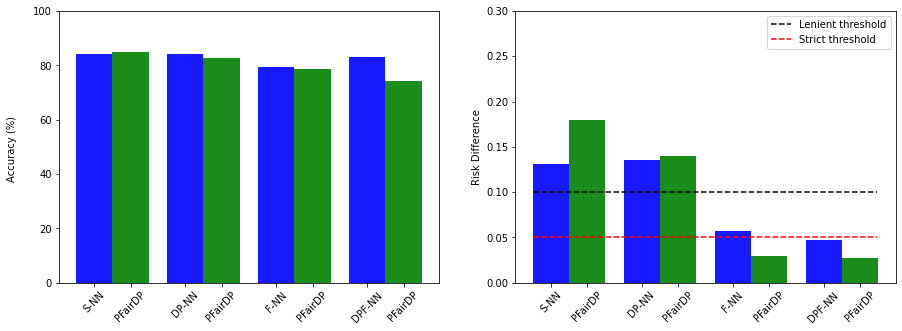

In [22]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)

def make_plot():
    orig_acc_means = [84.14, 84.03, 79.25, 82.98]
    orig_risk_diff_mean = [0.1310, 0.1355, 0.0566, 0.0475]

    pfairdp_acc_means = [
        statistics.mean(1 - results_SNN['Classification error']) * 100,
        statistics.mean(1 - results_DPNN['Classification error']) * 100,
        statistics.mean(1 - results_FNN['Classification error']) * 100,
        statistics.mean(1 - results_DPFNN['Classification error']) * 100,
    ]

    pfairdp_risk_diff_mean = [
        statistics.mean(abs(results_SNN['Fairness after (Risk difference)'])),
        statistics.mean(abs(results_DPNN['Fairness after (Risk difference)'])),
        statistics.mean(abs(results_FNN['Fairness after (Risk difference)'])),
        statistics.mean(abs(results_DPFNN['Fairness after (Risk difference)'])),
    ]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    x_vals = np.arange(4)
    
    ax1.bar(x_vals - 0.2, orig_acc_means, 0.4, label = 'Original models', color = 'blue', alpha=0.9)
    ax1.bar(x_vals + 0.2, pfairdp_acc_means, 0.4, label = 'PFairDP', color = 'green', alpha = 0.9)
    ax1.set_ylim(0, 100)

    ticks_ax1 = []
    for x in range(4):
        ticks_ax1.append(x - 0.2)
        ticks_ax1.append(x + 0.2)
    ax1.set_xticks(np.array(ticks_ax1), ['S-NN', 'PFairDP', 'DP-NN', 'PFairDP', 'F-NN', 'PFairDP', 'DPF-NN', 'PFairDP'], rotation = 45)
    ax1.set_ylabel("Accuracy (%) \n")

    ax2.bar(x_vals - 0.2, orig_risk_diff_mean, 0.4, color = 'blue', alpha=0.9)
    ax2.bar(x_vals + 0.2, pfairdp_risk_diff_mean, 0.4, color = 'green', alpha = 0.9)
    ax2.set_ylim(0, 0.3)

    ax2.set_xticks(np.array(ticks_ax1), ['S-NN', 'PFairDP', 'DP-NN', 'PFairDP', 'F-NN', 'PFairDP', 'DPF-NN', 'PFairDP'], rotation = 45)
    ax2.set_ylabel("Risk Difference")
    ax2.axhline(y = 0.1, xmin = 0.05, xmax = 0.95, color='black', linestyle='--', label = 'Lenient threshold')
    ax2.axhline(y = 0.05, xmin = 0.05, xmax = 0.95, color='r', linestyle='--', label = 'Strict threshold')
    ax2.legend()

make_plot()